<a href="https://colab.research.google.com/github/ten-jampa/MIT_Comp_psych/blob/main/Computational_Psychiatry_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implement your own toy-psychiatric-diagnosis model from scratch step by step


Reminder: The video below examplifies the trajectory of actions (decision making during the game) and the rewards the fake-participant saw on the screen as a result of each action. This is a short short video you will be able to generate yourself in the exercise of the decisions the simulated-patient performed in the game.

Disclaimer:

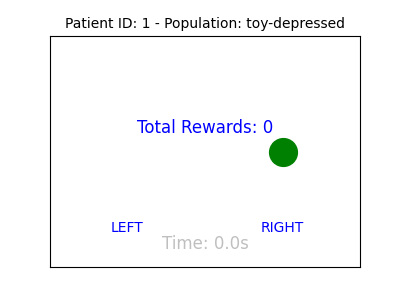

### Step 1: Simulating the Two-Arm Bandit Task

The Two-Arm Bandit Task is a decision-making game where participants choose between two options (arms). Each arm has a fixed but unknown probability of delivering a reward. Over time, participants must learn which arm is more rewarding.

This task helps us study how individuals adapt their behavior based on feedback. We will start by simulating the environment for this task.

In [1]:
import numpy as np

# Set up the two-arm bandit task
np.random.seed(42)

# Reward probabilities for the two arms
arm_probabilities = [0.2, 0.8]  # Arm 0 has 20% reward chance, Arm 1 has 80% reward chance

# Simulate rewards for 100 trials
def simulate_bandit(trials=1000):
    rewards = []
    choices = []
    for t in range(trials):
        choice = np.random.choice([0, 1])  # Random choice b/w 0 and 1
        reward = np.random.rand() < arm_probabilities[choice]
        #print(reward)
        rewards.append(reward)
        choices.append(choice)
    return np.array(choices), np.array(rewards)

# Simulate 1000 trials
choices, rewards = simulate_bandit(1000)

# Print the first 10 choices and rewards
print("Choices:", choices[:10])
print("Rewards:", rewards[:10])

Choices: [0 0 0 1 0 0 1 0 1 1]
Rewards: [False False False  True False False  True False False  True]


### Step 2: Implementing the Rescorla-Wagner (RW) Model
The Rescorla-Wagner (RW) model updates the value of each arm based on the difference between expected and received rewards (prediction error). It uses a learning rate (α) to determine how quickly it adapts.

We will implement and simulate the RW model and observe how it learns over 100 trials.

In [2]:
arm_probabilities = [0.2, 0.8]  # Arm 0 has 20% reward chance, Arm 1 has 80% reward chance

def simulate_RW(trials=3000, alpha=0.1, beta=5):
    # Initialize values for both arms
    Q = np.array([0.5, 0.5])  # Initial value estimates
    actions, rewards = [], []

    for t in range(trials):
        # Softmax to determine probabilities of choosing each arm
        probs = np.exp(beta * Q) / np.sum(np.exp(beta * Q))
        action = np.random.choice([0, 1], p=probs)  # Choose based on probabilities
        reward = np.random.rand() < arm_probabilities[action]  # Get reward
        #print(reward)
        # Update Q value for the chosen arm
        delta = reward - Q[action] #subtraction of boolean with a float (akin to doing (1,0) - ini_prob)
        #if reward == True, then your choice was good
        Q[action] += alpha * delta

        actions.append(action)
        rewards.append(reward)

    return np.array(actions), np.array(rewards), Q

# Simulate RW model
actions_RW, rewards_RW, final_Q_RW = simulate_RW(2000, alpha=0.1, beta=5)

# Print results
print("Final Q-values:", final_Q_RW) #these Q-Values shift a lof
print("Actions:", actions_RW[:10])
print("Rewards:", rewards_RW[:10])

Final Q-values: [0.23425833 0.7439365 ]
Actions: [1 0 1 1 1 1 1 1 1 1]
Rewards: [ True False  True  True  True  True  True  True False False]


### Comparing Healthy vs. Simulated "toyGipressed" Behavior

An assumption we make in this toy example for the sake of this exercise: Individuals with toyDepression may exhibit slower learning rates (lower α). We will simulate a toyDepresseion agent by reducing the learning rate and compare its performance to a healthy agent.

In [3]:
# Simulate a "toyGipressed" agent with a low learning rate
actions_toyGipressed, rewards_toyGipressed, final_Q_toyGipressed = simulate_RW(2000, alpha=0.001, beta=5)

# Compare final Q-values
print("Healthy Agent Q-values:", final_Q_RW)
print("toyGipressed Agent Q-values:", final_Q_toyGipressed)

# Compare average rewards
print("Healthy Agent Avg Rewards:", np.mean(rewards_RW))
print("toyGipressed Agent Avg Rewards:", np.mean(rewards_toyGipressed))

Healthy Agent Q-values: [0.23425833 0.7439365 ]
toyGipressed Agent Q-values: [0.37820953 0.74452344]
Healthy Agent Avg Rewards: 0.7655
toyGipressed Agent Avg Rewards: 0.656


### Introducing Randomness (ABDP)

An assumption we make in this toy example for the sake of this exercise: Individuals with toy-ABDP may exhibit increased randomness (higher β). We will simulate an "toy-ABDP" agent by increasing the randomness parameter and compare its behavior.

In [4]:
# Simulate an "toyABDP" agent with high randomness
actions_toyABDP, rewards_toyABDP, final_Q_toyABDP = simulate_RW(2000, alpha=0.1, beta=0.15)  # Lower beta -> more randomness, anolgous to B = 1/(KT)

# Compare average rewards and Q-values
print("toyABDP Agent Q-values:", final_Q_toyABDP)
print("toyABDP Agent Avg Rewards:", np.mean(rewards_toyABDP))

toyABDP Agent Q-values: [0.11947732 0.86593384]
toyABDP Agent Avg Rewards: 0.513


In [5]:
a = [True, True, False, True]
np.cumsum(a)

array([1, 2, 2, 3])

### Visualizing Behavior
Let’s visualize the performance (cumulative rewards) of the healthy, toyGipressed, and toyABDP agents over 1000 trials to see how their behaviors differ.

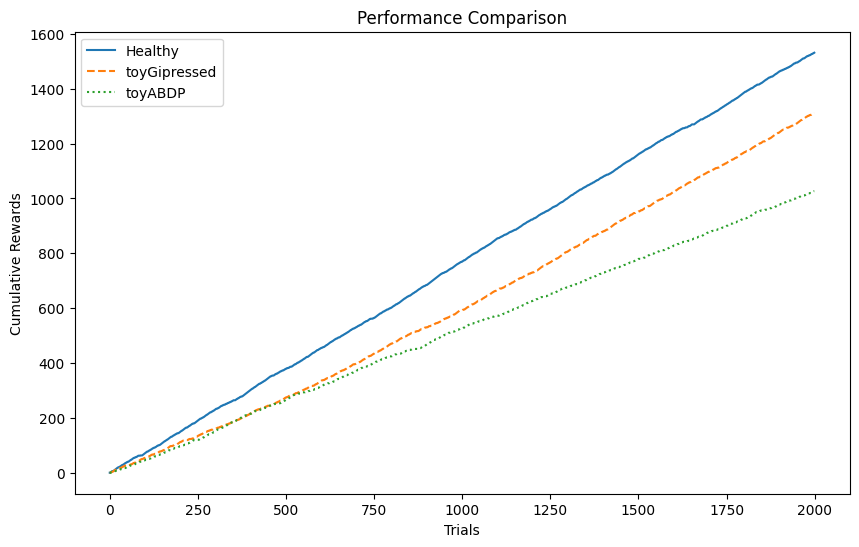

In [6]:
import matplotlib.pyplot as plt

# Cumulative rewards
cumulative_rewards_healthy = np.cumsum(rewards_RW)
cumulative_rewards_toyGipressed = np.cumsum(rewards_toyGipressed)
cumulative_rewards_toyABDP = np.cumsum(rewards_toyABDP)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(cumulative_rewards_healthy, label="Healthy")
plt.plot(cumulative_rewards_toyGipressed, label="toyGipressed", linestyle="--")
plt.plot(cumulative_rewards_toyABDP, label="toyABDP", linestyle=":")
plt.xlabel("Trials")
plt.ylabel("Cumulative Rewards")
plt.title("Performance Comparison")
plt.legend()
plt.show()

Some interesting things to be noted: The healthy person seems to be cumulating rewards at a linear rate, the depressed person seems to be cumulating rewards at a linear rate(but lower slope), the ABDP shows signs of flattening.

### Classifying Agents Based on Parameters

We can now classify agents (healthy, toyGipressed, toyABDP) based on their learning rate (α) and randomness (β). This is the foundation of using computational psychiatry for diagnostics.

In [7]:
# Classify based on parameter ranges
def classify_agent(alpha, beta):
    if alpha < 0.05:
        return "toyGipressed"
    elif beta < 2:
        return "toyABDP"
    else:
        return "Healthy"

# Test classification
print("Healthy Agent:", classify_agent(0.1, 5))
print("toyGipressed Agent:", classify_agent(0.01, 5))
print("toyABDP Agent:", classify_agent(0.1, 1))

Healthy Agent: Healthy
toyGipressed Agent: toyGipressed
toyABDP Agent: toyABDP


### Fitting Model Parameters to Simulated Data

To identify which model and parameters best mimic a person's behavior, we use **maximum likelihood estimation (MLE)**. This approach finds the parameter values (e.g., learning rate α, randomness β) that maximize the likelihood of observing the person's choices and rewards.

We'll start by creating a likelihood function for the Rescorla-Wagner (RW) model and use optimization techniques to estimate the best-fitting parameters.

In [8]:
from scipy.optimize import minimize

# Likelihood function for the RW model
def likelihood_RW(params, choices, rewards):
    alpha, beta = params #trying to search for what would normally be hyperparameters
    Q = np.array([0.5, 0.5])  # Initialize Q values
    log_likelihood = 0

    for t in range(len(choices)):
        # Softmax probabilities
        probs = np.exp(beta * Q) / np.sum(np.exp(beta * Q))
        chosen_prob = probs[choices[t]]

        # Update log-likelihood
        log_likelihood += np.log(chosen_prob + 1e-10)  # Add small value to prevent log(0)

        # Update Q value for the chosen arm
        delta = rewards[t] - Q[choices[t]]
        Q[choices[t]] += alpha * delta

    return -log_likelihood  # Return negative log-likelihood for minimization

# Fit parameters for a given dataset (e.g., Healthy agent)
initial_guess = [0.1, 5]  # Initial guesses for alpha and beta
bounds = [(1e-5, 1), (1e-1, 10)]  # Allow for a wider range of beta

result = minimize(likelihood_RW, initial_guess, args=(actions_RW, rewards_RW), bounds=bounds) #args are the things that you plug into the function

# Extract fitted parameters
fitted_alpha, fitted_beta = result.x
print("Fitted Alpha (Learning Rate):", fitted_alpha)
print("Fitted Beta (Randomness):", fitted_beta)

Fitted Alpha (Learning Rate): 0.11901187902563388
Fitted Beta (Randomness): 5.1898544853440685


### Repeating for Other Agents (toyGipressedAgent, toyABDPAgent)
We can repeat the parameter-fitting process for the "toyGipressed" and "toyABDP" agents to estimate their behavioral signatures. This will allow us to compare the fitted parameters across groups.

In [9]:
bounds = [(1e-5, 1), (1e-1, 25)]  # Allow for a wider range of beta

# Fit parameters for Gipressed agent
result_toyGipressed = minimize(likelihood_RW, initial_guess, args=(actions_toyGipressed, rewards_toyGipressed), bounds=bounds)
fitted_alpha_toyGipressed, fitted_beta_Gipressed = result_toyGipressed.x

# Fit parameters for ABDP agent
result_toyABDP = minimize(likelihood_RW, initial_guess, args=(actions_toyABDP, rewards_toyABDP), bounds=bounds)
fitted_alpha_toyABDP, fitted_beta_toyABDP = result_toyABDP.x

# Print results
print("toyGipressed Agent - Fitted Alpha Parameter:", fitted_alpha_toyGipressed, "Fitted Beta Parameter:", fitted_beta_Gipressed)
print("toyABDP Agent - Fitted Alpha Parameter:", fitted_alpha_toyABDP, "Fitted Beta Parameter:", fitted_beta_toyABDP)

toyGipressed Agent - Fitted Alpha Parameter: 0.0007829705776119262 Fitted Beta Parameter: 6.062231093366543
toyABDP Agent - Fitted Alpha Parameter: 1.0 Fitted Beta Parameter: 0.12464904478878298


### Step 9: Classifying Agents Based on Fitted Parameters
Using the fitted parameters, we can classify agents into groups based on their behavioral signatures (e.g., low learning rate for toyDepression, high randomness for toyABDP).

In [10]:
# Classify based on fitted parameters
print("Healthy Agent Classification:", classify_agent(fitted_alpha, fitted_beta))
print("toyGipressed Agent Classification:", classify_agent(fitted_alpha_toyGipressed, fitted_beta_Gipressed))
print("toyABDP Agent Classification:", classify_agent(fitted_alpha_toyABDP, fitted_beta_toyABDP))

Healthy Agent Classification: Healthy
toyGipressed Agent Classification: toyGipressed
toyABDP Agent Classification: toyABDP


### Step 10: Visualizing Fitted Parameters
Let’s visualize the fitted parameters (learning rate and randomness) for the three groups to highlight their differences. This will help us understand how parameters separate different behavioral patterns. This illustrate how the behavior of different populations with different conditions can be recognized using computational tools as distinct, and this hints why we can use computational tools to evaluate and classify people in healthcare

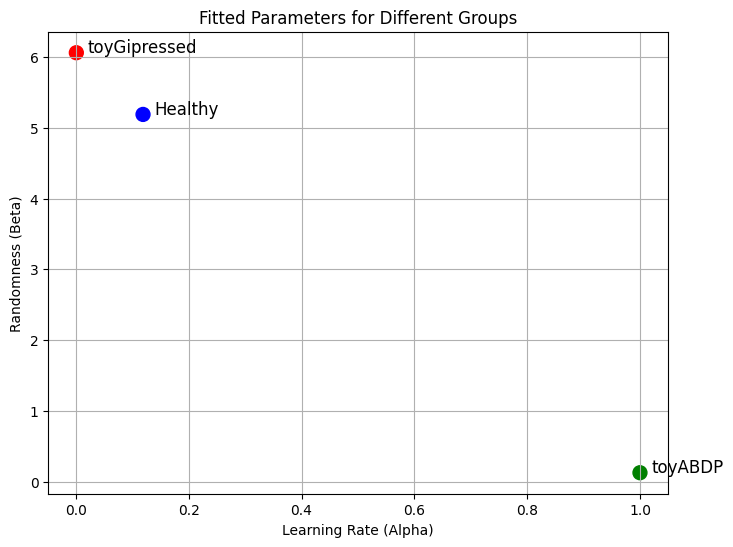

In [11]:
# Plot fitted parameters
groups = ["Healthy", "toyGipressed", "toyABDP"]
alphas = [fitted_alpha, fitted_alpha_toyGipressed, fitted_alpha_toyABDP]
betas = [fitted_beta, fitted_beta_Gipressed, fitted_beta_toyABDP]

plt.figure(figsize=(8, 6))
plt.scatter(alphas, betas, c=["blue", "red", "green"], s=100)
for i, group in enumerate(groups):
    plt.text(alphas[i] + 0.02, betas[i], group, fontsize=12)

plt.xlabel("Learning Rate (Alpha)")
plt.ylabel("Randomness (Beta)")
plt.title("Fitted Parameters for Different Groups")
plt.grid(True)
plt.show()



### Step 11: Interpreting Results
The fitted parameters for the three groups allow us to see distinct behavioral signatures:
- **Healthy:** Moderate learning rate and low randomness.
- **toyGipressed:** Low learning rate, indicating slow reward learning.
- **toyABDP:** High randomness, reflecting inconsistent decision-making.

These distinctions are toy examples and not real clinical findings. However, they illustrate how computational modeling can link behavior to underlying tendencies.


In [12]:
# Simulate new data for validation
actions_healthy_val, rewards_healthy_val, _ = simulate_RW(1000, alpha=fitted_alpha, beta=fitted_beta)
actions_toyGipressed_val, rewards_toyGipressed_val, _ = simulate_RW(1000, alpha=fitted_alpha_toyGipressed, beta=fitted_beta_Gipressed)
actions_toyABDP_val, rewards_toyABDP_val, _ = simulate_RW(1000, alpha=fitted_alpha_toyABDP, beta=fitted_beta_toyABDP)

# Refit parameters to validate
result_healthy_val = minimize(likelihood_RW, initial_guess, args=(actions_healthy_val, rewards_healthy_val), bounds=bounds)
result_toyGipressed_val = minimize(likelihood_RW, initial_guess, args=(actions_toyGipressed_val, rewards_toyGipressed_val), bounds=bounds)
result_toyABDP_val = minimize(likelihood_RW, initial_guess, args=(actions_toyABDP_val, rewards_toyABDP_val), bounds=bounds)

# Validate classification
print("Healthy Validation Classification:", classify_agent(*result_healthy_val.x))
print("toyGipressed Validation Classification:", classify_agent(*result_toyGipressed_val.x))
print("toyABDP Validation Classification:", classify_agent(*result_toyABDP_val.x))

Healthy Validation Classification: Healthy
toyGipressed Validation Classification: toyGipressed
toyABDP Validation Classification: toyABDP


## Generate simulated-data (to simulate the act of collecting data in the lab with real patients)

In [33]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import pandas as pd

# Simulate a patient's behavior based on given alpha and beta
def simulate_RW(n_trials, alpha, beta):
    Q = np.zeros(2)  # Two actions
    actions = []
    rewards = []

    for _ in range(n_trials):
        probs = np.exp(beta * Q) / np.sum(np.exp(beta * Q))  # Softmax
        action = np.random.choice([0, 1], p=probs)
        reward = np.random.choice([0, 1])  # Random rewards (50/50)

        actions.append(action)
        rewards.append(reward)
        Q[action] += alpha * (reward - Q[action])  # Update Q-value

    return actions, rewards

# Generate dataset of patients
def generate_dataset(n_patients, n_trials):
    patients = []
    populations = ["toy-healthy", "toy-Gipressed", "toy-adhd"]

    for i in range(n_patients):
        if i % 3 == 0:  # Healthy
            alpha, beta = 0.1, 5
        elif i % 3 == 1:  # Gipressed
            alpha, beta = 0.01, 5
        else:  # ABDP
            alpha, beta = 0.1, 1

        actions, rewards = simulate_RW(n_trials, alpha, beta)
        patients.append({
            "ID": i,
            "Population": populations[i % 3],
            "Actions": actions,
            "Rewards": rewards
        })

    return patients

# Generate training and validation datasets
n_patients = 100
n_trials = 1000
train_patients = generate_dataset(n_patients, n_trials) #train
val_patients = generate_dataset(n_patients // 2, n_trials) #test

### Step 12: Use collected data to evaluate from which population it came from.

Now, we share with you data we have synthesizdd for this exercise. First explore the data.

In [21]:
# Explore the data table of training set.
train_df = pd.DataFrame(train_patients)
train_df.head(10)

ID     Population                                            Actions  \
0   0    toy-healthy  [0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, ...   
1   1  toy-Gipressed  [1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, ...   
2   2       toy-adhd  [0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, ...   
3   3    toy-healthy  [1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, ...   
4   4  toy-Gipressed  [1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, ...   
5   5       toy-adhd  [1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, ...   
6   6    toy-healthy  [1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, ...   
7   7  toy-Gipressed  [1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, ...   
8   8       toy-adhd  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...   
9   9    toy-healthy  [1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, ...   

                                             Rewards  
0  [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, ...  
1  [0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, ...  
2  [0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, ...  
3  [1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, ...  
4  [1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, ...  
5  [1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, ...  
6  [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, ...  
7  [1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, ...  
8  [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, ...  
9  [1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, ...

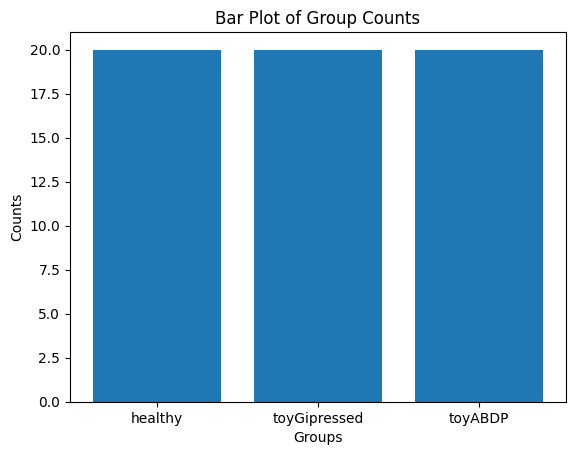

In [34]:
def plot_population(pd_df):
    total = len(pd_df)
    healthy_count = np.sum(pd_df['Population'] == 'toy-healthy')
    GiPressed_count = np.sum(pd_df['Population'] == 'toy-Gipressed')
    Adhd_count = np.sum(pd_df['Population'] == 'toy-adhd')
    group_counts = (healthy_count, GiPressed_count, Adhd_count)
    group_labels = ('healthy', 'toyGipressed', 'toyABDP')
    try:
      plt.bar(group_labels, group_counts)
    except:
      import matplotlib.pyplot as plt
      plt.bar(group_labels, group_counts)
    # Customize the plot
    plt.xlabel('Groups')
    plt.ylabel('Counts')
    plt.title('Bar Plot of Group Counts')

    # Display the plot
    plt.show()

plot_population(train_df) #uniform count across the groups, probably not realistic

KeyError: 1

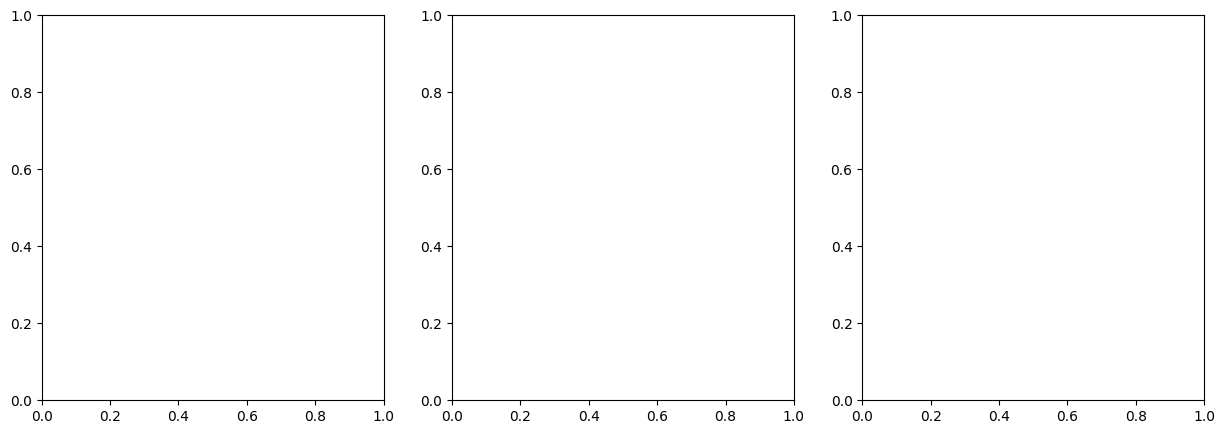

In [46]:
# prompt: Using dataframe train_df: plot the histograms of the three distinct population

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming 'Actions' and 'Rewards' columns contain numerical data that can be plotted as histograms
# If not, you need to pre-process them to extract numerical features

# Get unique population values
populations = train_df['Population'].unique()

# Create subplots for each population
fig, axes = plt.subplots(1, len(populations), figsize=(15, 5))

for i, pop in enumerate(populations):
    pop_data = train_df[train_df['Population'] == pop]

    # Assuming Actions is a list of actions, convert it into numerical representation if necessary
    # Example for converting categorical actions to numerical labels
    if isinstance(pop_data['Actions'].iloc[0], list):
        actions = np.concatenate(pop_data['Actions'])
    else:
        actions = pop_data['Actions']

    # Convert Actions to numerical, assuming numerical data already
    try:
        actions = pd.to_numeric(actions)
    except:
        print("actions was not converted")

    axes[i].hist(actions, bins='auto', alpha=0.7)
    axes[i].set_title(f'Population: {pop}')
    axes[i].set_xlabel('Actions')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [20]:
# Explore the data table of validation set.
validate_df = pd.DataFrame(val_patients)
validate_df.head(10)

ID     Population                                            Actions  \
0   0    toy-healthy  [0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, ...   
1   1  toy-Gipressed  [1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, ...   
2   2       toy-adhd  [0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, ...   
3   3    toy-healthy  [0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, ...   
4   4  toy-Gipressed  [1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, ...   
5   5       toy-adhd  [1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, ...   
6   6    toy-healthy  [1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, ...   
7   7  toy-Gipressed  [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, ...   
8   8       toy-adhd  [0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, ...   
9   9    toy-healthy  [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...   

                                             Rewards  
0  [1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, ...  
1  [1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, ...  
2  [1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, ...  
3  [0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, ...  
4  [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, ...  
5  [1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, ...  
6  [1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, ...  
7  [1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, ...  
8  [0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, ...  
9  [0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, ...

You can also explore the trajectory of `actions` (decision making during the game) and the `rewards` the fake-participant saw on the screen as a result of each action. For example, by calling the function `visualize_patient_decision_making(train_patients[1])` you can generate a short video of the decisions the simulated-patient performed in the game.

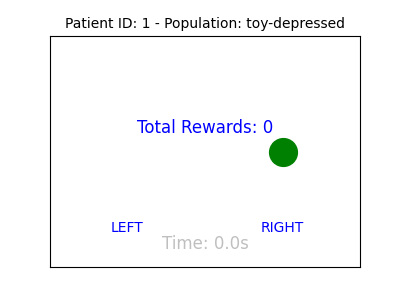

Animation saved as trajectory_with_transparent_time.gif


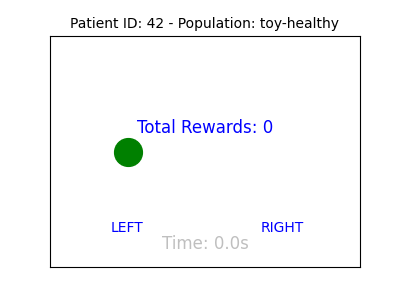

Change the patient id to explore more


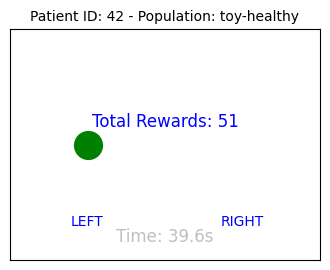

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import Image, display

# Create the animation for decisions, rewards, and time
def visualize_patient_decision_making(patient, filename="trajectory_with_transparent_time.gif"):
    actions = patient["Actions"]
    rewards = patient["Rewards"]
    n_trials = int(len(actions)/10)

    # Initialize figure
    fig, ax = plt.subplots(figsize=(4, 3))
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f"Patient ID: {patient['ID']} - Population: {patient['Population']}", fontsize=10)

    # Initialize decision dot
    decision_dot, = ax.plot([], [], "o", color="green", markersize=20)

    # Add text for accumulated rewards in the center
    reward_text = ax.text(0, 0.2, "", fontsize=12, ha="center", va="center", color="blue")

    # Add time text with transparency (light gray)
    time_text = ax.text(0, -0.8, "Time: 0s", fontsize=12, ha="center", va="center", color="gray", alpha=0.5)

    # Add left and right labels
    ax.text(-0.5, -0.7, "LEFT", fontsize=10, ha="center", color="blue")
    ax.text(0.5, -0.7, "RIGHT", fontsize=10, ha="center", color="blue")

    # Update function for animation
    def update(frame):
        action = actions[frame]
        reward = rewards[frame]

        # Calculate total rewards up to this frame
        total_reward = sum(rewards[:frame + 1])

        # Update decision dot position (Left = -0.5, Right = 0.5)
        decision_dot.set_data([-0.5 if action == 0 else 0.5], [0])

        # Update accumulated rewards text
        reward_text.set_text(f"Total Rewards: {total_reward}")

        # Update time text (assuming each frame is 0.4 seconds)
        time_text.set_text(f"Time: {frame * 0.4:.1f}s")

        return decision_dot, reward_text, time_text

    # Create animation
    ani = animation.FuncAnimation(fig, update, frames=n_trials, interval=400, repeat=False)

    # Save animation as GIF
    ani.save(filename, writer="pillow")
    print(f"Animation saved as {filename}")
    display(Image(filename))

# Example: Generate GIF for Patient 1 (toy-Gipressed)
patient_id_to_visualize = 42 ### XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX Change this
visualize_patient_decision_making(train_patients[patient_id_to_visualize])
print("Change the patient id to explore more")

## Bonus challenge: Can you develop a classifier?
NOTE: The dataset contains simulated patient data, with each data point representing an individual patient. Each patient has played one simulated game over time, generating a sequence of actions and rewards recorded at each time step.

When you plot these data points, you’ll notice patterns emerge. The colored dots represent the population type the patient belongs to. Can you identify the patterns? It seems that the dots naturally form clusters. A human observer might intuitively distinguish between these groups.

Your next challenge is to develop a classifier that can accurately predict the true population type for each point in the validation set. We’ve provided a basic method to get you started, but as an optional exercise, you’re encouraged to improve upon it using your machine learning skills. Show us what you can achieve!

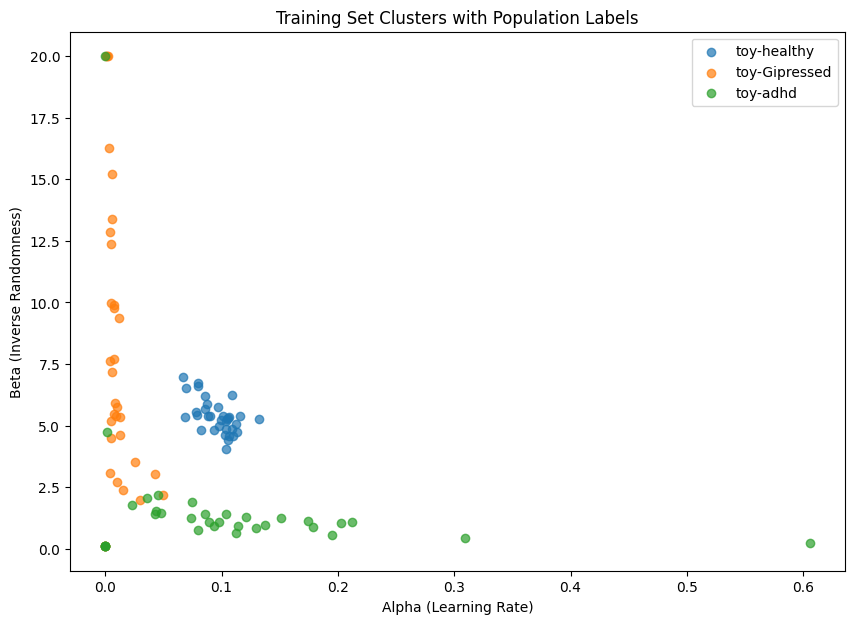

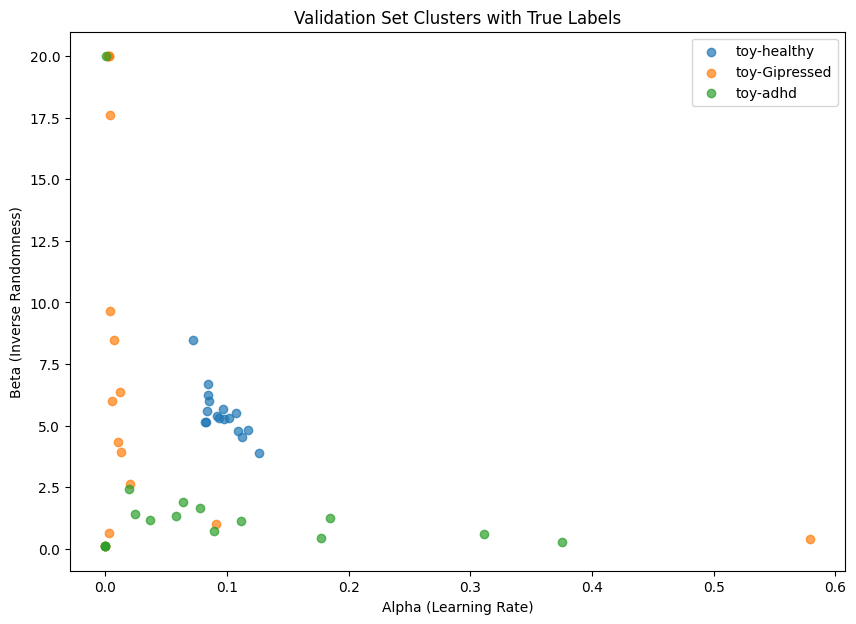

Model Accuracy on Validation Set: 74.00%; Can you do better?


In [51]:
def likelihood_RW(params, actions, rewards):
    alpha, beta = params
    Q = np.array([0.5, 0.5])  # Initialize Q values
    log_likelihood = 0

    for t in range(len(actions)):
        probs = np.exp(beta * Q) / np.sum(np.exp(beta * Q))
        chosen_prob = probs[actions[t]]
        log_likelihood += np.log(chosen_prob + 1e-10)  # Avoid log(0)
        delta = rewards[t] - Q[actions[t]]
        Q[actions[t]] += alpha * delta

    return -log_likelihood  # Negative for minimization

# Fit model to training patients
def fit_patients(patients):
    fitted_params = []
    bounds = [(1e-5, 1), (1e-1, 20)]
    initial_guess = [0.1, 5]

    for patient in patients:
        result = minimize(likelihood_RW, initial_guess, args=(patient["Actions"], patient["Rewards"]), bounds=bounds)
        fitted_params.append({"ID": patient["ID"], "Alpha": result.x[0], "Beta": result.x[1], "Population": patient["Population"]})

    return pd.DataFrame(fitted_params)

# Fit parameters for training and validation sets
train_params = fit_patients(train_patients)
val_params = fit_patients(val_patients)
val_params.head()

# Plot clusters in training set
def plot_clusters(params_df, title):
    plt.figure(figsize=(10, 7))
    for population in params_df["Population"].unique():
        subset = params_df[params_df["Population"] == population]
        plt.scatter(subset["Alpha"], subset["Beta"], label=population, alpha=0.7)
    plt.xlabel("Alpha (Learning Rate)")
    plt.ylabel("Beta (Inverse Randomness)")
    plt.title(title)
    plt.legend()
    plt.show()

plot_clusters(train_params, "Training Set Clusters with Population Labels")

# Test the model on validation set
def test_model(val_params, train_params):
    population_means = train_params.groupby("Population")[["Alpha", "Beta"]].mean()

    def predict_population(alpha, beta):
      #the current prediction is running on this mean distance calculation
        distances = []
        for pop, mean in population_means.iterrows():
            dist = np.sqrt((alpha - mean["Alpha"])**2 + (beta - mean["Beta"])**2)
            distances.append((pop, dist))
        return min(distances, key=lambda x: x[1])[0]

    val_params["Predicted Population"] = val_params.apply(lambda row: predict_population(row["Alpha"], row["Beta"]), axis=1)
    accuracy = np.mean(val_params["Population"] == val_params["Predicted Population"])
    return val_params, accuracy

val_results, accuracy = test_model(val_params, train_params)

# Plot validation set clusters with true labels
plot_clusters(val_results, "Validation Set Clusters with True Labels")

# Print accuracy
print(f"Model Accuracy on Validation Set: {accuracy * 100:.2f}%; Can you do better?")


Yes we can do better! We can built a classifier or a simple BDT model to predict what population a new patient with an evaluated alpha and beta be.


In [43]:
# To see the changes in the dataframe after the fit function is applied
train_params.head()
#we see that the new df has removed the info of rewards and choices and
#instead has the alpha, beta, and the population type

ID     Alpha       Beta     Population
0   0  0.135771   4.363345    toy-healthy
1   1  0.000010   0.000326  toy-Gipressed
2   2  0.000905  19.998458       toy-adhd
3   3  0.092984   4.881271    toy-healthy
4   4  0.003653  10.484166  toy-Gipressed

In [45]:
val_params.head()
#we see that the test_df has a new column with predicted population against the ground truth for testing

ID     Alpha       Beta     Population Predicted Population
0   0  0.091827   5.296442    toy-healthy          toy-healthy
1   1  0.006236  13.575184  toy-Gipressed        toy-Gipressed
2   2  0.043398   2.088234       toy-adhd          toy-healthy
3   3  0.106972   5.252639    toy-healthy          toy-healthy
4   4  0.001212  19.988217  toy-Gipressed        toy-Gipressed